In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
df = pd.read_csv("D:\\DE NOTEBOOKS\\uas MPML\\restaurant_menu_optimization_data.csv")



In [5]:
# --- Deskripsi awal dataset ---
print("Info Data:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe(include='all'))

Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RestaurantID   1000 non-null   object 
 1   MenuCategory   1000 non-null   object 
 2   MenuItem       1000 non-null   object 
 3   Ingredients    1000 non-null   object 
 4   Price          1000 non-null   float64
 5   Profitability  1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB
None

Statistik Deskriptif:
       RestaurantID MenuCategory  MenuItem       Ingredients       Price  \
count          1000         1000      1000              1000  1000.00000   
unique            3            4        16                 4         NaN   
top            R001    Beverages  Iced Tea  ['confidential']         NaN   
freq            354          264        72               264         NaN   
mean            NaN          NaN       NaN               NaN    12.8180

In [6]:
### CEK UNTUK MISSING VALUE
print(df.isnull().sum())

RestaurantID     0
MenuCategory     0
MenuItem         0
Ingredients      0
Price            0
Profitability    0
dtype: int64


In [7]:
  
df.duplicated().sum()# Mengecek duplikasi data

27

In [8]:
# Menampilkan baris yang duplikat
df[df.duplicated()]


,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
108,R001,Beverages,Soda,['confidential'],2.81,Low
185,R001,Beverages,Soda,['confidential'],4.05,Medium
244,R002,Beverages,Iced Tea,['confidential'],2.73,Low
261,R002,Beverages,Iced Tea,['confidential'],3.65,Medium
304,R001,Desserts,Chocolate Lava Cake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",17.44,High
363,R001,Beverages,Soda,['confidential'],2.81,Low
404,R002,Appetizers,Bruschetta,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",9.81,Medium
437,R002,Appetizers,Bruschetta,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",9.81,Medium
498,R002,Main Course,Shrimp Scampi,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",18.43,Medium
577,R003,Beverages,Iced Tea,['confidential'],4.40,Medium


In [9]:
# Hapus baris duplikat
df = df.drop_duplicates()


In [10]:
print(df)


    RestaurantID MenuCategory               MenuItem  \
0           R003    Beverages                   Soda   
1           R001   Appetizers  Spinach Artichoke Dip   
2           R003     Desserts    New York Cheesecake   
3           R003  Main Course        Chicken Alfredo   
4           R002  Main Course          Grilled Steak   
..           ...          ...                    ...   
995         R003    Beverages                   Soda   
996         R001   Appetizers          Caprese Salad   
997         R003  Main Course     Vegetable Stir-Fry   
998         R002     Desserts               Tiramisu   
999         R001    Beverages                   Soda   

                                           Ingredients  Price Profitability  
0                                     ['confidential']   2.55           Low  
1         ['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']  11.12        Medium  
2             ['Chocolate', 'Butter', 'Sugar', 'Eggs']  18.66          High  
3    ['Chicken'

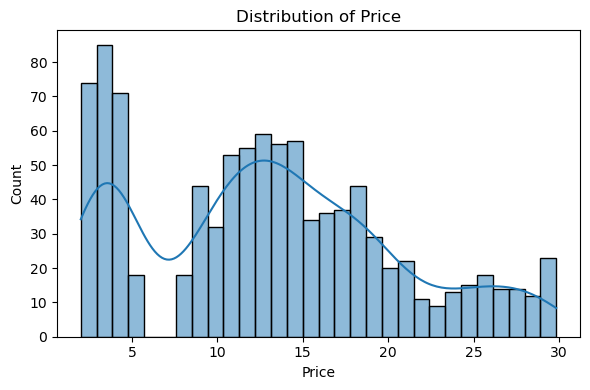

In [9]:
# --- Visualisasi distribusi numerik (Histogram) ---
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

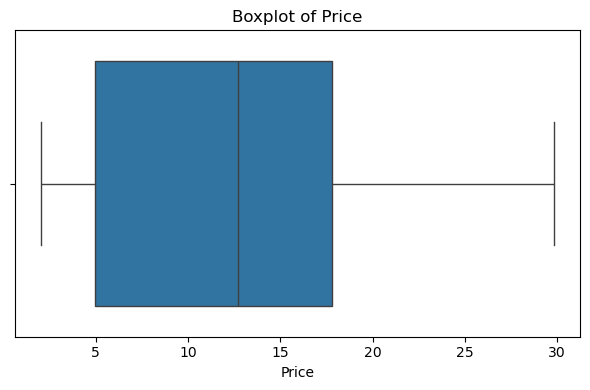

In [11]:
# --- Boxplot untuk deteksi outlier ---
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

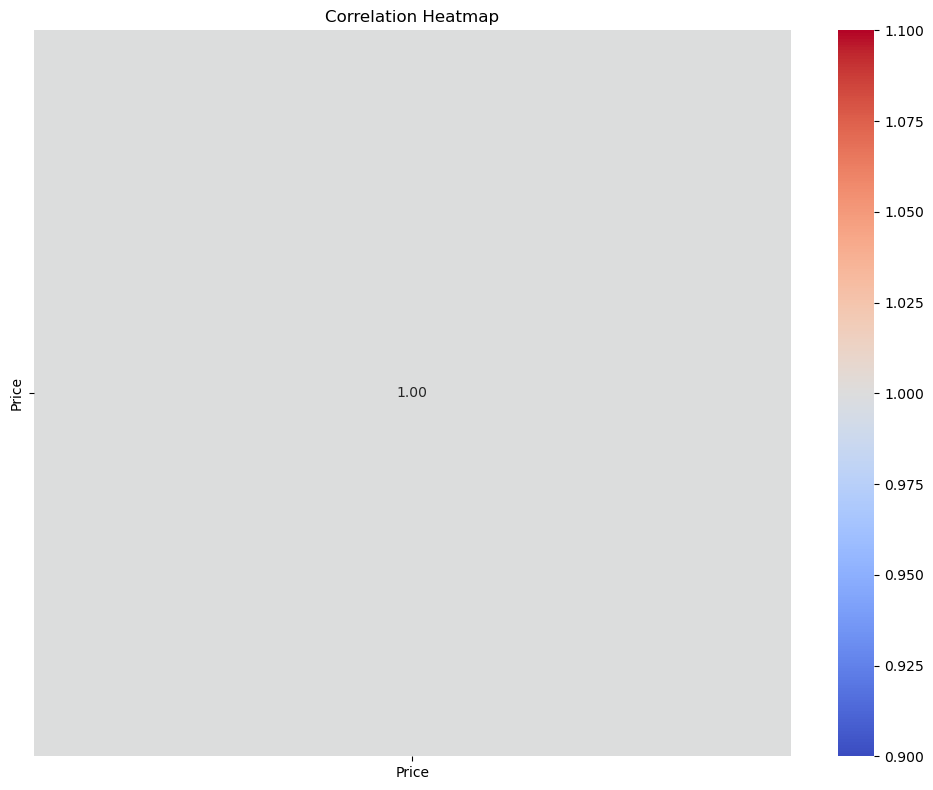

In [12]:
# --- Heatmap korelasi ---
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

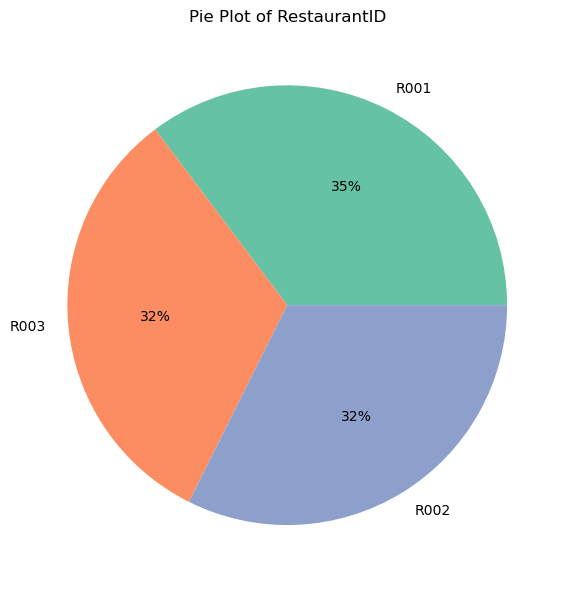

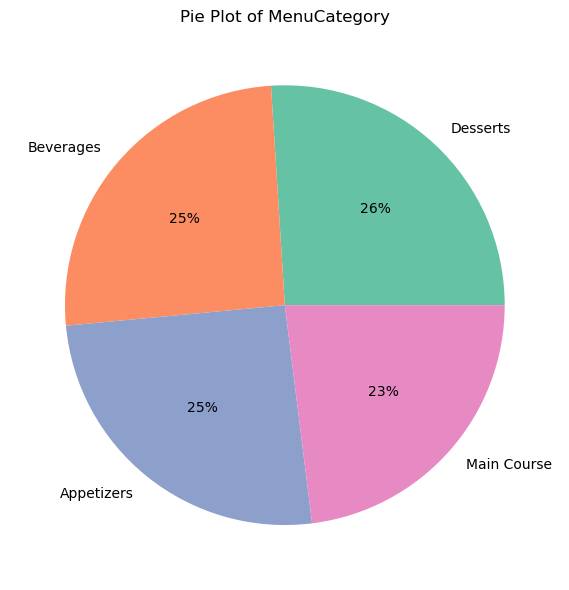

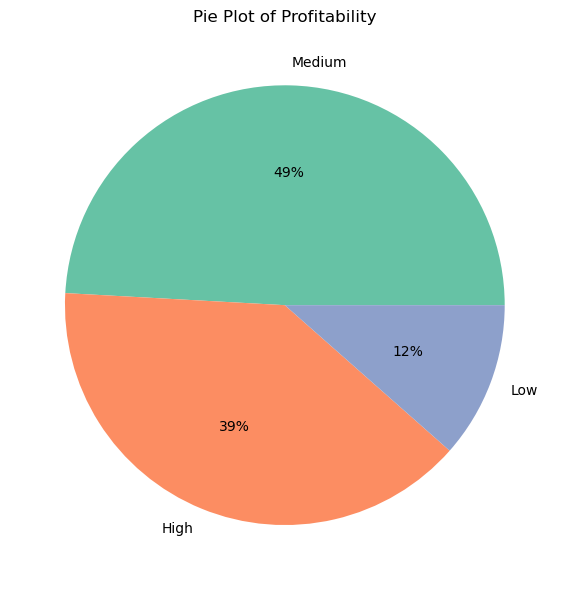

In [13]:
# --- Pie plot untuk fitur kategorikal ---
def pie_plot(col):
    plt.figure(figsize=(6,6))
    colors = sns.color_palette('Set2')
    df[col].value_counts().plot.pie(autopct='%1.0f%%', colors=colors)
    plt.title(f'Pie Plot of {col}')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

pie_plot('RestaurantID')
pie_plot('MenuCategory')
pie_plot('Profitability')

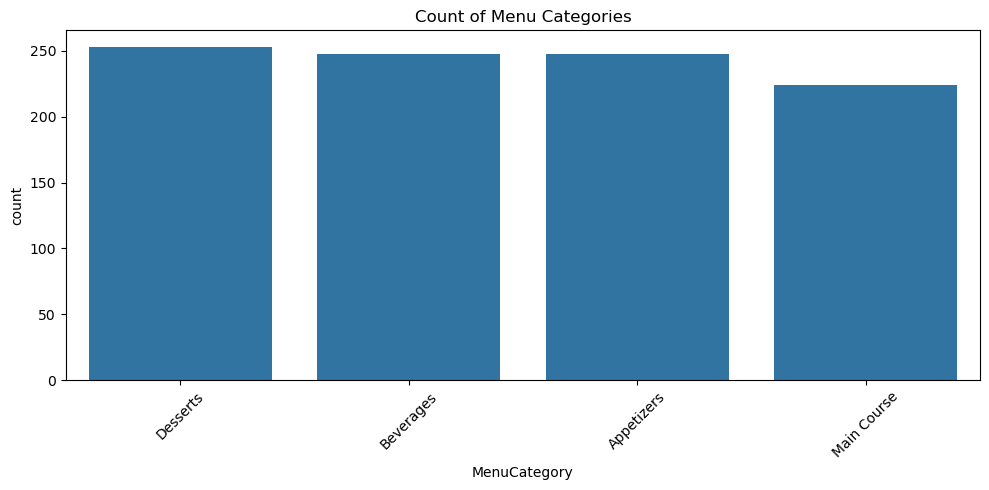

In [11]:
# --- Countplot fitur kategorikal ---
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='MenuCategory', order=df['MenuCategory'].value_counts().index)
plt.title('Count of Menu Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

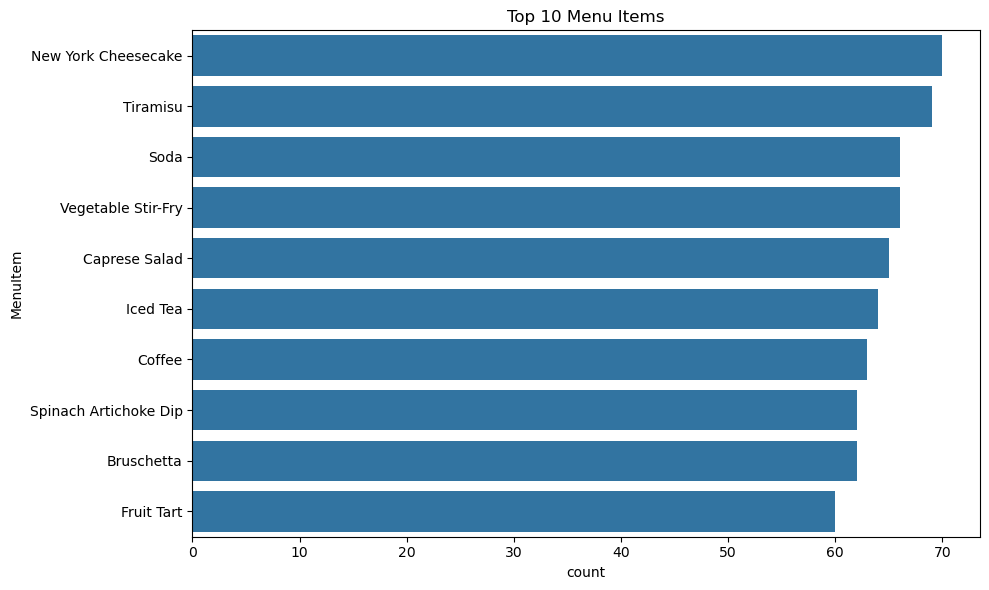

In [12]:
# --- Top 10 MenuItem ---
top_10_menu = df['MenuItem'].value_counts().head(10).index
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['MenuItem'].isin(top_10_menu)], y='MenuItem', order=top_10_menu)
plt.title('Top 10 Menu Items')
plt.tight_layout()
plt.show()

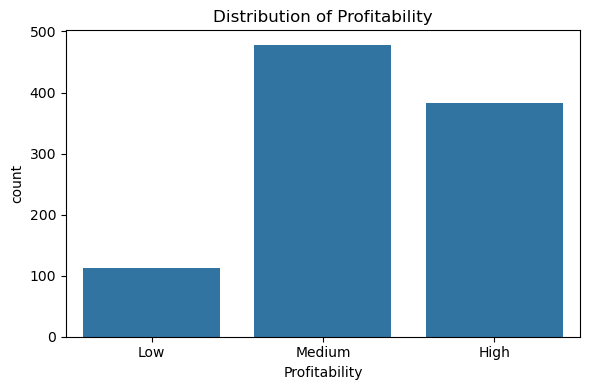

In [13]:
# --- Distribusi target ---
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Profitability')
plt.title('Distribution of Profitability')
plt.tight_layout()
plt.show()

In [14]:
print("\nClass balance (%):")
print(df['Profitability'].value_counts(normalize=True) * 100)


Class balance (%):
Profitability
Medium    49.126413
High      39.362795
Low       11.510791
Name: proportion, dtype: float64


Hipotesis:
Menu dengan harga lebih tinggi dan kategori seperti Main Course atau Beverages
cenderung lebih profitable

### STAGE 2

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [16]:
# Encode target menjadi label numerik: High, Medium, Low → 0, 1, 2
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Profitability'])

# Simpan encoder untuk deployment
import joblib
joblib.dump(label_encoder, 'target_encoder.pkl')


['target_encoder.pkl']

In [17]:
# Pisahkan fitur
X = df.drop(['Profitability'], axis=1)


In [18]:
# Identifikasi fitur numerik & kategorikal
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include='object').columns

# Pipeline numerik
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline kategorikal
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [19]:
# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [21]:
# Transform
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


### STAGE 3

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [23]:
# Model dictionary (sebelum tuning)
models_default = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42)
}



In [24]:
# Evaluasi semua model default
for name, model in models_default.items():
    model.fit(X_train_preprocessed, y_train)
    y_pred = model.predict(X_test_preprocessed)
    print(f"\n===== {name} (Sebelum Tuning) =====")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))



===== Decision Tree (Sebelum Tuning) =====
[[68  4  5]
 [ 4 15  3]
 [ 9  2 85]]
              precision    recall  f1-score   support

        High       0.84      0.88      0.86        77
         Low       0.71      0.68      0.70        22
      Medium       0.91      0.89      0.90        96

    accuracy                           0.86       195
   macro avg       0.82      0.82      0.82       195
weighted avg       0.86      0.86      0.86       195


===== Random Forest (Sebelum Tuning) =====
[[69  3  5]
 [ 4 14  4]
 [ 7  2 87]]
              precision    recall  f1-score   support

        High       0.86      0.90      0.88        77
         Low       0.74      0.64      0.68        22
      Medium       0.91      0.91      0.91        96

    accuracy                           0.87       195
   macro avg       0.84      0.81      0.82       195
weighted avg       0.87      0.87      0.87       195


===== SVM (Sebelum Tuning) =====
[[72  0  5]
 [ 4  1 17]
 [ 8  1 87]]
     

In [25]:
# 1. Decision Tree
param_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_dt, cv=3, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train_preprocessed, y_train)
best_dt = grid_dt.best_estimator_
print("\nBest Params (Decision Tree):", grid_dt.best_params_)



Best Params (Decision Tree): {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [26]:
# 2. Random Forest
param_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_rf, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_rf.fit(X_train_preprocessed, y_train)
best_rf = grid_rf.best_estimator_
print("\nBest Params (Random Forest):", grid_rf.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits

Best Params (Random Forest): {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [27]:
# 3. SVM
param_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_svm = GridSearchCV(SVC(probability=True), param_svm, cv=3, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train_preprocessed, y_train)
best_svm = grid_svm.best_estimator_
print("\nBest Params (SVM):", grid_svm.best_params_)


Best Params (SVM): {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [28]:
# Final evaluation dengan model hasil tuning
models_tuned = {
    'Decision Tree': best_dt,
    'Random Forest': best_rf,
    'SVM': best_svm
}

for name, model in models_tuned.items():
    print(f"\n===== {name} (Setelah Tuning) =====")
    y_pred = model.predict(X_test_preprocessed)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


===== Decision Tree (Setelah Tuning) =====
[[73  1  3]
 [ 4 14  4]
 [ 7  0 89]]
              precision    recall  f1-score   support

        High       0.87      0.95      0.91        77
         Low       0.93      0.64      0.76        22
      Medium       0.93      0.93      0.93        96

    accuracy                           0.90       195
   macro avg       0.91      0.84      0.86       195
weighted avg       0.90      0.90      0.90       195


===== Random Forest (Setelah Tuning) =====
[[74  0  3]
 [ 4 14  4]
 [ 5  0 91]]
              precision    recall  f1-score   support

        High       0.89      0.96      0.93        77
         Low       1.00      0.64      0.78        22
      Medium       0.93      0.95      0.94        96

    accuracy                           0.92       195
   macro avg       0.94      0.85      0.88       195
weighted avg       0.92      0.92      0.91       195


===== SVM (Setelah Tuning) =====
[[72  0  5]
 [ 4 11  7]
 [10  1 85]]
     

### STAGE 4

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import joblib

# --- Training model ---
# Misal preprocessor sudah dibuat dan X_train, y_train sudah siap
# Pastikan X_train sudah mentah (belum di-preprocess)
best_model = RandomForestClassifier(random_state=42)

# Bungkus preprocessor + model ke dalam pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)
joblib.dump(pipeline, 'pipeline_rf.pkl')


print("\nPipeline (preprocessor + model) disimpan sebagai 'pipeline_rf.pkl'.")



Pipeline (preprocessor + model) disimpan sebagai 'pipeline_rf.pkl'.


In [31]:
import sklearn
sklearn.__version__


'1.6.1'